<a href="https://colab.research.google.com/github/BHariKrishnaReddy/DeeplearningTF/blob/main/ANN_with_keras_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape,y_train_full.shape,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

### Creating the model using the Sequential API
Now let’s build the neural network! Here is a classification MLP with two hidden layers:
* The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

In [ ]:
# creates a Sequential model & neural networks that are just composed of a single stack of layers connected sequentially
model = keras.models.Sequential()

# First Layer
# Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 28*28)
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Dense hidden layer with 300 neurons. It will use the ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

# Dense output layer with 10 neurons (one per class), using the softmax activation function
model.add(keras.layers.Dense(10, activation="softmax"))

#the above set of code can be ..
'''
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

'''

'\nmodel = keras.models.Sequential([\n    keras.layers.Flatten(input_shape=[28, 28]),\n    keras.layers.Dense(300, activation="relu"),\n    keras.layers.Dense(100, activation="relu"),\n    keras.layers.Dense(10, activation="softmax")\n])\n\n'

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Specifying `activation="relu"` is equivalent to specifying `activation=keras.activations.relu`. for the full list visit [activations](https://keras.io/activations/) , [initializers](https://keras.io/initializers/)

Code examples documented on keras.io



In [ ]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

### model.compile

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs.

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 14s 7ms/step - loss: 0.7291 - accuracy: 0.7616 - val_loss: 0.5138 - val_accuracy: 0.8272
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4922 - accuracy: 0.8289 - val_loss: 0.4598 - val_accuracy: 0.8476
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4445 - accuracy: 0.8446 - val_loss: 0.4480 - val_accuracy: 0.8470
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4173 - accuracy: 0.8532 - val_loss: 0.4044 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3968 - accuracy: 0.8606 - val_loss: 0.3872 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3798 - accuracy: 0.8660 - val_loss: 0.4010 - val_accuracy: 0.8598
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3653 - accuracy: 0.8715 - val_loss: 0.3554 - val_accuracy

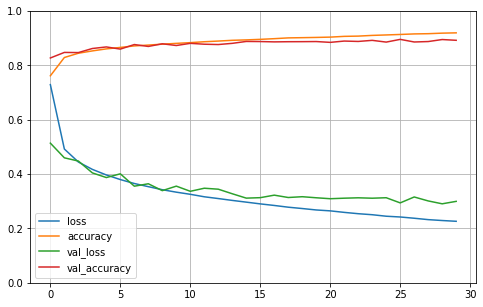

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Good! Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting. 

### Building Complex Models Using the Functional API

*  nonsequential neural network is a Wide & Deep neural network

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
#First, we need to create an Input object.This is a specification of the kind of input(multiple inputs) the model will get, including its shape and dtype.
input_ = keras.layers.Input(shape=X_train.shape[1:])

#Dense layer & ReLU activation function.
#we call it like a function, passing it the input. This is why this is called the Functional API. 
#Note that we are just telling Keras how it should connect the layers together, no actual data is being processed yet.
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

#second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)


#created a Concatenate layer as function, to concatenate the input and the output of the second hidden layer.
#You may prefer the keras.layers.concatenate() function, which creates a Concatenate layer and immediately calls it with the given inputs.
concat = keras.layers.Concatenate()([input_, hidden2])

#passing it the result of the concatenation.
output = keras.layers.Dense(1)(concat)

#Keras Model, specifying which inputs and outputs
model = keras.Model(inputs=[input_], outputs=[output])

compile the model, train it, evaluate it, and use it to make predictions.

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 2s 2ms/step - loss: 2.1980 - val_loss: 1.3932
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8284 - val_loss: 0.7802
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7077 - val_loss: 0.6841
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6655 - val_loss: 0.6514
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6377 - val_loss: 0.6293
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6157 - val_loss: 0.6088
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5975 - val_loss: 0.5967
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5822 - val_loss: 0.5821
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5691 - val_loss: 0.5742
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5581 - val_loss: 0.5616
Epoch 11/2

In [ ]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [ ]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.7669 - main_output_loss: 0.6513 - aux_output_loss: 1.8070 - val_loss: 0.6208 - val_main_output_loss: 0.5612 - val_aux_output_loss: 1.1570
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5485 - main_output_loss: 0.4938 - aux_output_loss: 1.0409 - val_loss: 0.7159 - val_main_output_loss: 0.6904 - val_aux_output_loss: 0.9457
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5203 - main_output_loss: 0.4776 - aux_output_loss: 0.9046 - val_loss: 0.5091 - val_main_output_loss: 0.4687 - val_aux_output_loss: 0.8733
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4758 - main_output_loss: 0.4381 - aux_output_loss: 0.8151 - val_loss: 0.4965 - val_main_output_loss: 0.4640 - val_aux_output_loss: 0.7892
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4659 - main_output_loss: 0.4340 - aux_output_loss: 0.7528 - val_loss

In [ ]:
#When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])


162/162 [==============================] - 0s 1ms/step - loss: 0.3812 - main_output_loss: 0.3652 - aux_output_loss: 0.5258


In [ ]:
#Similarly, the predict() method will return predictions for each output:

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

(array([[2.8578284 ],
        [0.45430085],
        [1.4380919 ]], dtype=float32), array([[3.0577278],
        [0.7453272],
        [1.4685725]], dtype=float32))

## Building SubClasses

In [3]:
class WideandDeep(keras.Model):
  def __init__(self,units = 30 ,activation = 'relu',**kwargs):
      super().__init__(**kwargs)
      self.hidden1 = keras.layers.Dense(units,activation=activation)
      self.hidden2 = keras.layers.Dense(units,activation=activation)
      self.output  = keras.layer.Dense(1)
      self.aux_otp = keras.layer.Dense(1)
  
  def call(self,inputs):
    inA,inB = inputs
    hidden1 = self.hidden1(inB)
    hidden2 = self.hidden2(hidden1)
    aux_otp = self.aux_otp(hidden2)
    concat =  keras.layers.concatenate([inA,inB])
    output =  self.output(concat)
    return output,aux_otp

#### Saving and Restoring
> model = keras.models.Sequential([...]) # or keras.Model([...])

> model.compile([...])

> model.fit([...])

* Keras will use the HDF5 format to save both the model’s architecture
> model.save("keras_model.h5")

* Loading the model
> model = keras.models.load_model("keras_model.h5")

### Using Callbacks
* If you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far.

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("keras_model.h5",save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("keras_model.h5") # roll back to best model

#                               __-----or-----__

# Another way to implement early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

## Fine-Tuning Neural Network Hyperparameters
* Use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space. To do this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)


from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])